<a href="https://colab.research.google.com/github/risen9/scaler-projects/blob/main/Jamboree_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement and Introduction

Jamboree wants us to predict if their students get accepted into the top Ivy League schools in the US. This feature estimates the chances of graduate admission from an Indian perspective.

Our analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

# 1. Exploratory Data Analysis

## Importing libraries and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
jam = pd.read_csv('/content/Jamboree_Admission.txt')
jam.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [65]:
jam.shape

(500, 8)

Removing the unique column 'Serial No.' as it does not help with modeling

In [6]:
jam = jam.drop(['Serial No.'], axis = 1)
jam.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
jam.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
jam.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


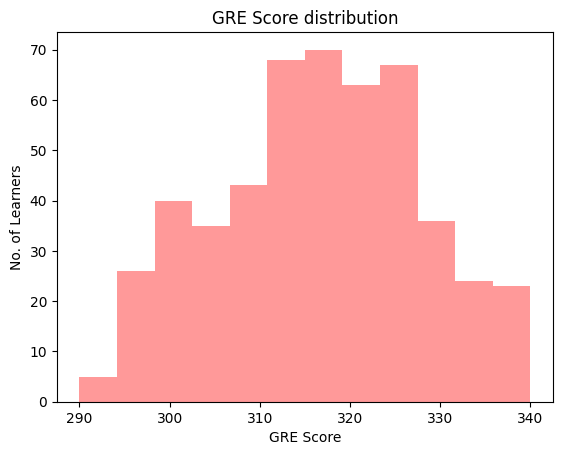

In [16]:
fig = sns.distplot(jam['GRE Score'], color = 'red', kde = False)
fig.set(xlabel = 'GRE Score', ylabel = 'No. of Learners')
plt.title('GRE Score distribution')
plt.show()

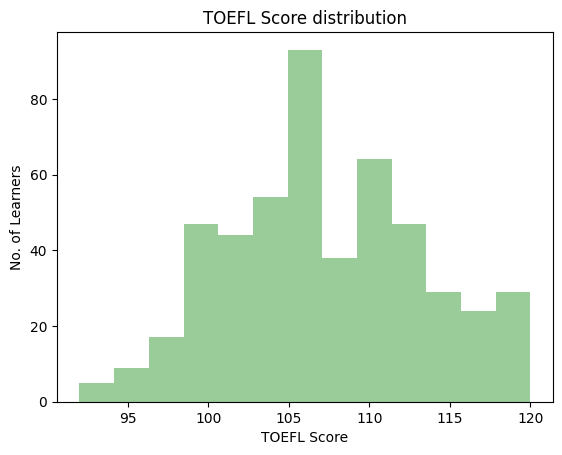

In [17]:
fig = sns.distplot(jam['TOEFL Score'], color = 'green', kde = False)
fig.set(xlabel = 'TOEFL Score', ylabel = 'No. of Learners')
plt.title('TOEFL Score distribution')
plt.show()

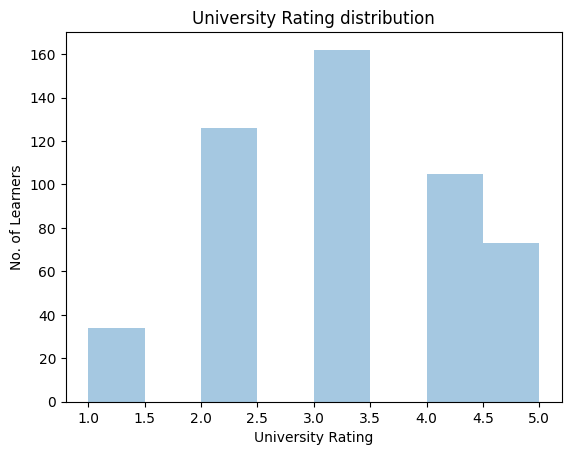

In [19]:
fig = sns.distplot(jam['University Rating'], kde = False)
fig.set(xlabel = 'University Rating', ylabel = 'No. of Learners')
plt.title('University Rating distribution')
plt.show()

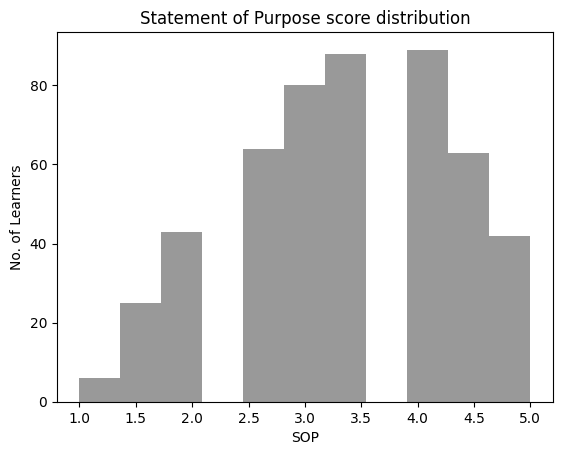

In [34]:
fig = sns.distplot(jam['SOP'], color = 'black', kde = False)
fig.set(xlabel = 'SOP', ylabel = 'No. of Learners')
plt.title('Statement of Purpose score distribution')
plt.show()

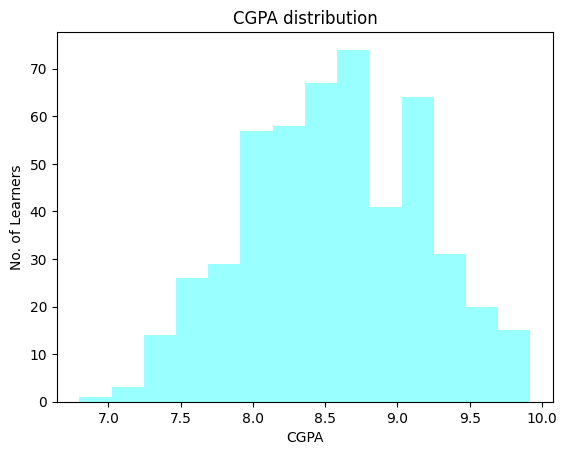

In [24]:
fig = sns.distplot(jam['CGPA'], color = 'cyan', kde = False)
fig.set(xlabel = 'CGPA', ylabel = 'No. of Learners')
plt.title('CGPA distribution')
plt.show()

# Comparing different features to each other

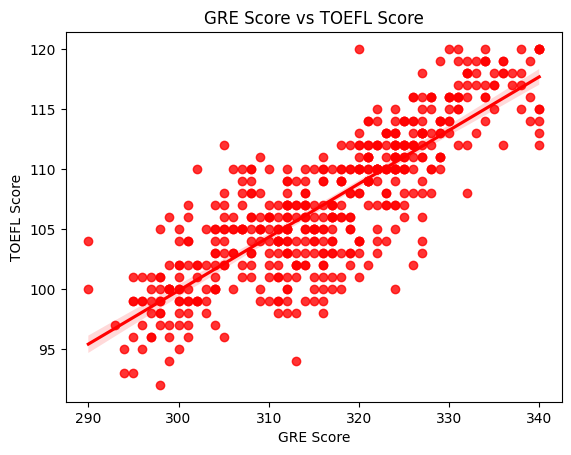

In [25]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=jam, color = 'red')
fig.set(xlabel = 'GRE Score', ylabel = 'TOEFL Score')
plt.title("GRE Score vs TOEFL Score")
plt.show()

GRE and TOEFL scores are directly proportional, within reason.

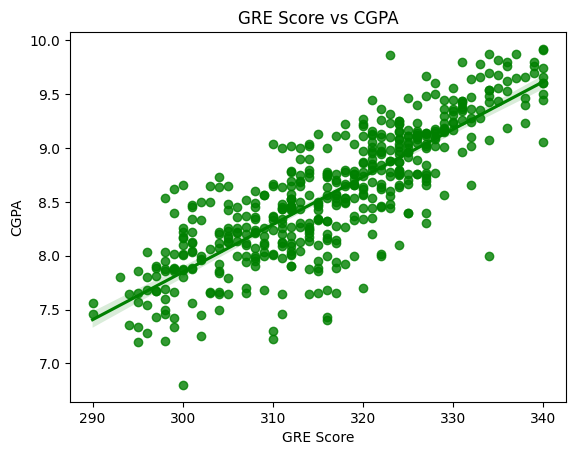

In [26]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=jam, color = 'green')
fig.set(xlabel = 'GRE Score', ylabel = 'CGPA')
plt.title("GRE Score vs CGPA")
plt.show()

GRE score and CGPA are directly proportional, within reason.

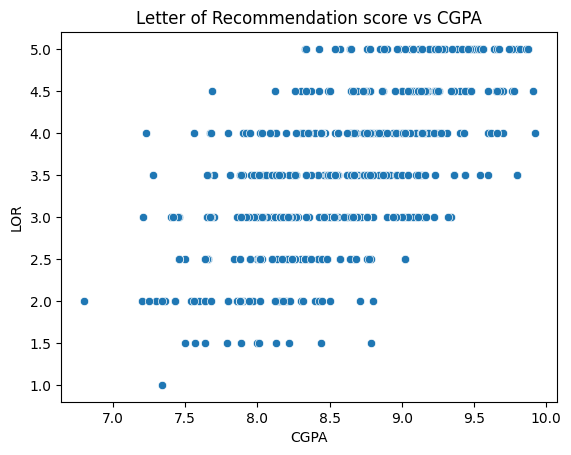

In [30]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=jam)
fig.set(xlabel = 'CGPA', ylabel = 'LOR')
plt.title("Letter of Recommendation score vs CGPA")
plt.show()

No relationship between LoR score and CGPA

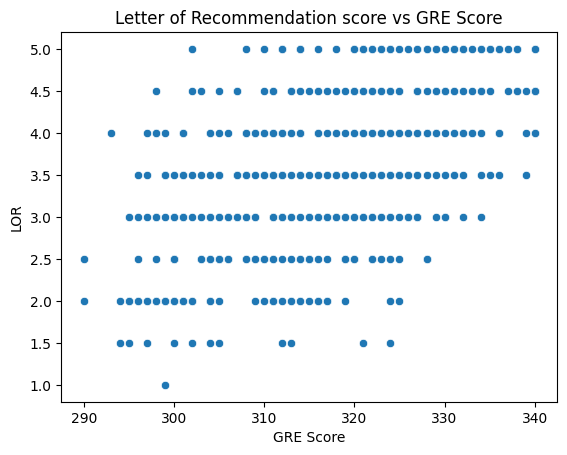

In [31]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=jam)
fig.set(xlabel = 'GRE Score', ylabel = 'LOR')
plt.title("Letter of Recommendation score vs GRE Score")
plt.show()

No relationship between LoR score and GRE Score

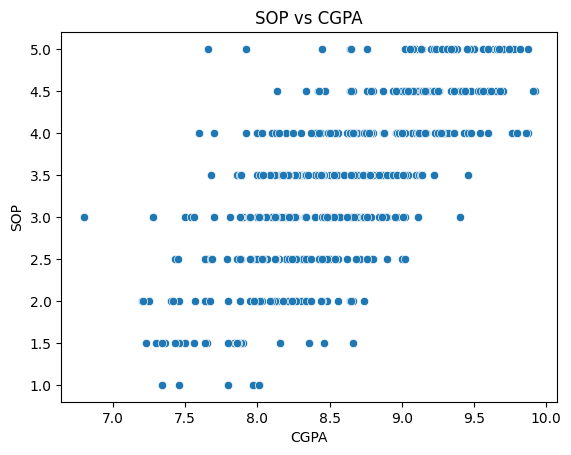

In [33]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=jam)
fig.set(xlabel = 'CGPA', ylabel = 'SOP')
plt.title("SOP vs CGPA")
plt.show()

No relationship between CGPA and Statement of Purpose score

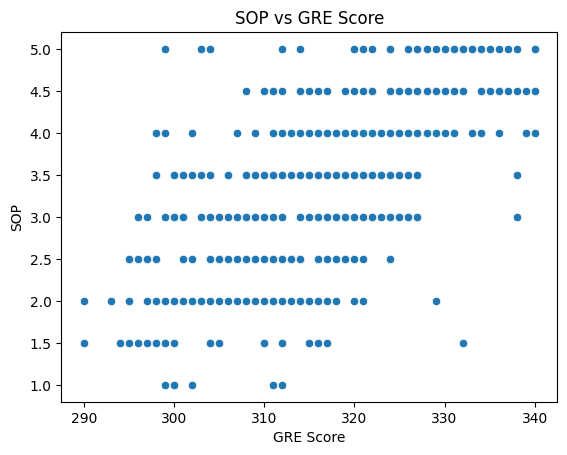

In [35]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=jam)
fig.set(xlabel = 'GRE Score', ylabel = 'SOP')
plt.title("SOP vs GRE Score")
plt.show()

No relationship between GRE Score and Statement of Purpose score

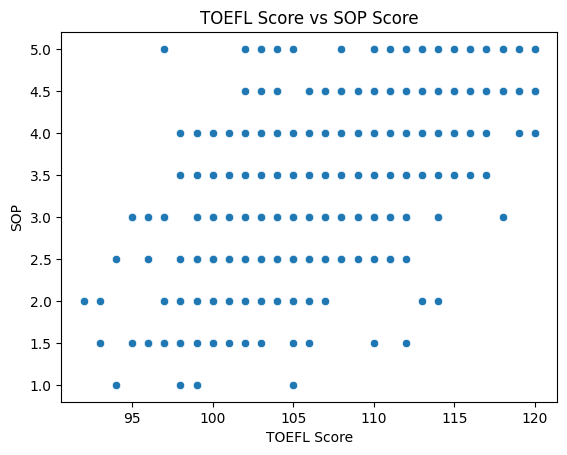

In [39]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=jam)
fig.set(xlabel = 'TOEFL Score', ylabel = 'SOP')
plt.title("TOEFL Score vs SOP Score")
plt.show()

No relationship between TOEFL Score and Statement of Purpose score

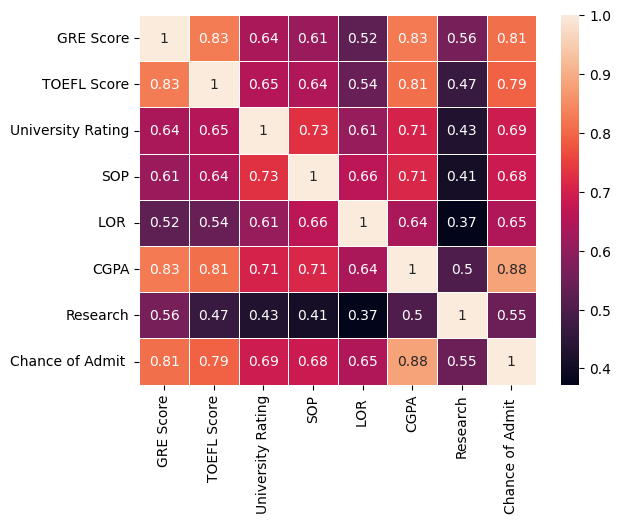

In [41]:
corr = jam.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

# Employing Linear Regression

### Creating the train-test split

In [43]:
from sklearn.model_selection import train_test_split
X = jam.drop(['Chance of Admit '], axis=1)
y = jam['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
462,307,105,4,3.0,3.0,7.94,0
63,315,107,2,4.0,3.0,8.50,1
235,326,111,5,4.5,4.0,9.23,1
6,321,109,3,3.0,4.0,8.20,1
37,300,105,1,1.0,2.0,7.80,0
...,...,...,...,...,...,...,...
17,319,106,3,4.0,3.0,8.00,1
476,304,104,3,2.5,2.0,8.12,0
443,321,114,5,4.5,4.5,9.16,1
31,327,103,3,4.0,4.0,8.30,1


### Standardisation

In [44]:
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)


In [45]:
X_train_std

array([[-0.82302611, -0.34021351,  0.78799829, ..., -0.49490472,
        -1.02265196, -1.08347268],
       [-0.11542709, -0.0115048 , -0.92970916, ..., -0.49490472,
        -0.10565889,  0.92295821],
       [ 0.85752157,  0.6459126 ,  1.64685202, ...,  0.57227527,
         1.08970708,  0.92295821],
       ...,
       [ 0.41527218,  1.13897565,  1.64685202, ...,  1.10586526,
         0.97508295,  0.92295821],
       [ 0.94597145, -0.66892221, -0.07085543, ...,  0.57227527,
        -0.43315642,  0.92295821],
       [-0.20387697,  0.48155825, -0.07085543, ...,  0.57227527,
         0.3855874 , -1.08347268]])

In [46]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.823026,-0.340214,0.787998,-0.354459,-0.494905,-1.022652,-1.083473
1,-0.115427,-0.011505,-0.929709,0.658281,-0.494905,-0.105659,0.922958
2,0.857522,0.645913,1.646852,1.164650,0.572275,1.089707,0.922958
3,0.415272,0.317204,-0.070855,-0.354459,0.572275,-0.596905,0.922958
4,-1.442175,-0.340214,-1.788563,-2.379938,-1.562085,-1.251900,-1.083473
...,...,...,...,...,...,...,...
395,0.238372,-0.175859,-0.070855,0.658281,-0.494905,-0.924403,0.922958
396,-1.088376,-0.504568,-0.070855,-0.860828,-1.562085,-0.727904,-1.083473
397,0.415272,1.138976,1.646852,1.164650,1.105865,0.975083,0.922958
398,0.945971,-0.668922,-0.070855,0.658281,0.572275,-0.433156,0.922958


### Importing the model libraries

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
models = [['Linear Regression :', LinearRegression()],['Lasso Regression :', Lasso(alpha=0.1)],['Ridge Regression :', Ridge(alpha=1.0)]]
print("Without removing features with multicollinearity")

Without removing features with multicollinearity


In [49]:
for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Linear Regression : 0.058374478190585416
Lasso Regression : 0.11212851710419883
Ridge Regression : 0.058307312566606824


In [51]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     261.7
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          1.81e-143
Time:                        13:57:54   Log-Likelihood:                 557.79
No. Observations:                 400   AIC:                            -1100.
Df Residuals:                     392   BIC:                            -1068.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7178      0.00

In [63]:
X_train_new=X_train.drop(columns='SOP')
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     305.8
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          1.18e-144
Time:                        14:05:24   Log-Likelihood:                 557.61
No. Observations:                 400   AIC:                            -1101.
Df Residuals:                     393   BIC:                            -1073.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7178      0.00

### Checking multicollinearity using VIF

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(ds,col):
  ds=ds.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=ds.columns
  vif['VIF_Value']=[variance_inflation_factor(ds.values,i) for i in range(ds.shape[1])]
  return vif

In [55]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.398648
2,TOEFL Score,3.802050
3,University Rating,2.333622
4,LOR,1.890531
5,CGPA,4.415787
6,Research,1.467669


All the VIF values here are less than 5, so we can proceed onward.

### Calculating MAE and RMSE

In [56]:
X_test_std= std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_train_columns)
X_test = sm.add_constant(X_test)
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))
print(f'Dropping {X_test_del} from test set')
X_test_new=X_test.drop(columns=X_test_del)
pred = model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Dropping ['SOP'] from test set
Mean Absolute Error  0.044104759098288614
Root Mean Square Error  0.05797789067593471


### Mean of Residuals

In [57]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals = ",mean_residuals)

Mean of Residuals =  0.0034420960513115357


### Homoscedasticity check using residuals vs fitted values plot

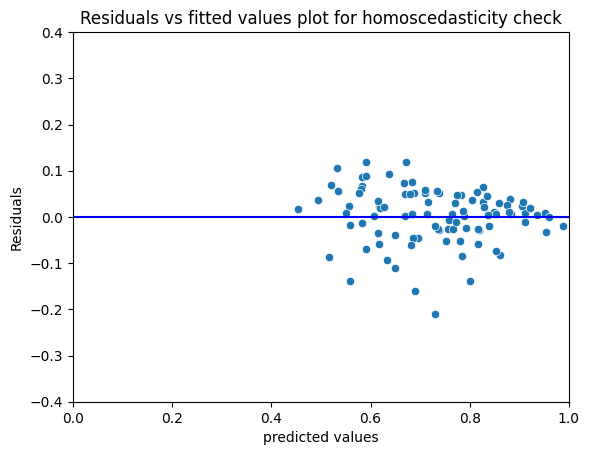

In [58]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Null hypothesis : Error terms are homoscedastic

Alternate hypothesis: Error terms are not homoscedastic

Running a hypothesis test

In [59]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)


[('F statistic', 0.5861582792096209), ('p-value', 0.9564239713164319)]

P value < 0.05, therefore we reject null hypothesis, and the error terms are indeed not homoscedastic.

### Checking normality of residuals

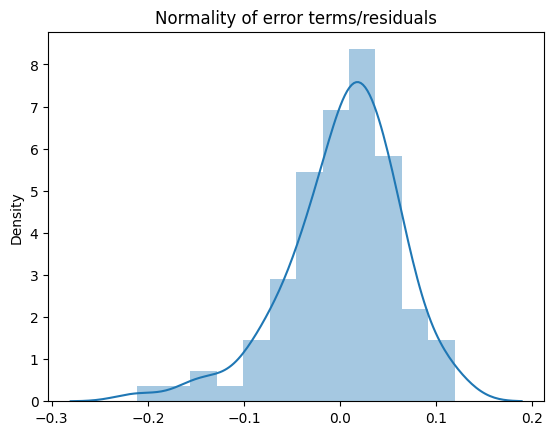

In [60]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

### Plotting y_test vs y_pred

Text(0, 0.5, 'y_pred')

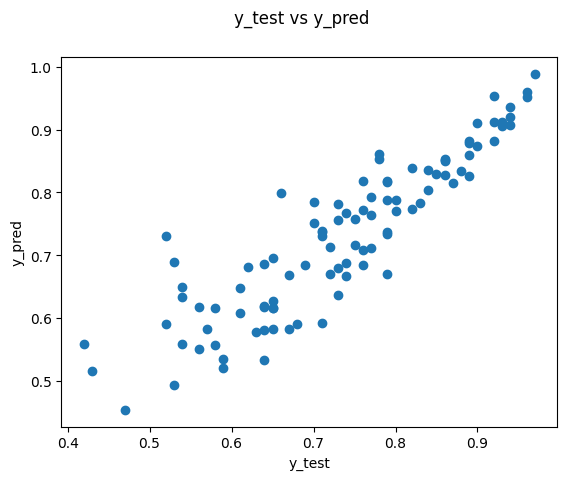

In [62]:
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

# Business Insights

* Several key predictors are correlated with admission chances. They are the learner's GRE Score, TOEFL Score, and their CGPA.

* Linear and Ridge Regression both had good performance.

* No issues in multicollinearity



# Recommendations

* Learners can be advised to work on their CGPA, GRE and TOEFL scores for a good acceptance rate.

* Current data does not factor in learners' extracurricular achievements, and a method to quantitatively assess and score them should be developed.

